IMPORT LIBRARIES

In [43]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

LOAD DATA

In [2]:
US_df = pd.read_csv("UsArrests.csv", index_col='City')
US_df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
#To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function give us insight into the statistical properties of the columns
stats = US_df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


From the statistical view above we can make a few deductions of what the data is telling us.

Deductions:
Assault makes up the most arrests of 1973 as it has the highest average value. Assault also had the highest maximum value of 337, adding to this fact.
Murder is the least amount of arrests with the lowest average value.

Looking at the statistics of the Urban Population, each urban area that was part of the data has an average population of 65.54. With the smallest area consisting of 32.00 and largest area consisting of 91.00.

In order to ensure calculations are done correctly and findings are as accurate as possible, we check the data for any
missing values and check the data types for all the columns. 
If missing values in the rows we will drop those rows or impute them where possible.
If data types are incorrect or if they will produce errors during analysis, we will change types to what is required.

In [4]:
# Count missing values
missing = US_df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [5]:
# Examine types
US_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


HISTOGRAMS

Plotting a histogram of the observations allows for a visualisation of each feature, this helps us understand the data a little bit better in order to continue with the analysis.

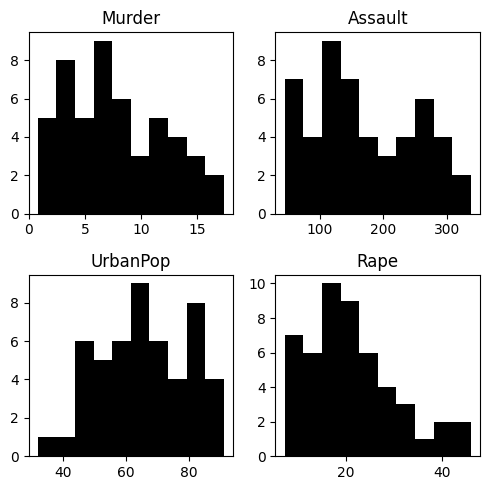

In [7]:
# Plot histograms
histograms = US_df.hist(color='black', grid=False, figsize=(5, 5)) 
plt.tight_layout()
plt.show()

CORRELATION ANALYSIS

Doing a correlation analysis on the data allows us to see how or if each column correlates with one another.

<Axes: >

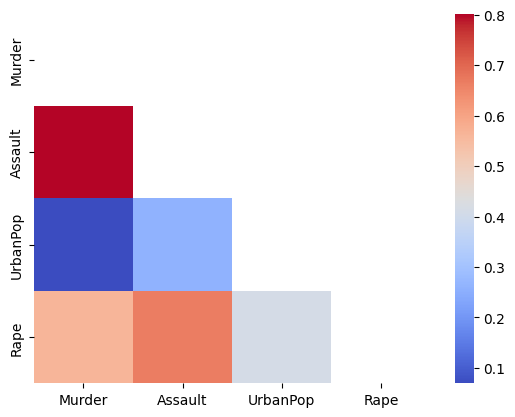

In [9]:
# Plot the correlation:
city = US_df.index
corr_df = US_df.corr()
labels = corr_df.columns

correlations = corr_df.corr()

mask_ut=np.triu(np.ones(corr_df.shape)).astype(bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")

FINDINGS

From the above correlation visualisation we can see that Murder and Assault have a strong correlation to each other (i.e a positive correlation).
This correlation can be intuitive as it is often seen that victims of assault may succum to injuries and die, or the assault could be so brutal that a victim dies during the attack, all of which constitute as murder.

Whereas, Murder and UrbanPop have a strong negative correlation, showing that these are not in any way linked to one another.

PCA ANALYSIS

In [30]:
# Extract the feature columns
X = US_df.iloc[:, :5]

# Standardise the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_transformed = pca.fit_transform(X_scaled)

# Create a DataFrame for the transformed data:
df_pca = pd.DataFrame(X_transformed)

# Display the first few rows of the transformed data:
df_pca.head()

,0,1,2,3
0,0.99,1.13,-0.44,0.16
1,1.95,1.07,2.04,-0.44
2,1.76,-0.75,0.05,-0.83
3,-0.14,1.12,0.11,-0.18
4,2.52,-1.54,0.60,-0.34


FEATURE IMPORTANCE

In [35]:
pc1 = abs(pca.components_[0])
pc2 = abs(pca.components_[1])

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.54,0.42
1,Assault,0.58,0.19
2,UrbanPop,0.28,0.87
3,Rape,0.54,0.17


From the above feature importance we observe the following:

In the first principal component, Assault has the highest importance followed by Murder and Rape with equal importance.
However, the second principal component shows that Murder has a significantly higher importance to Assault and Rape (if we are excluding the Urban Population as a factor).

HIERARCHICAL CLUSTERING

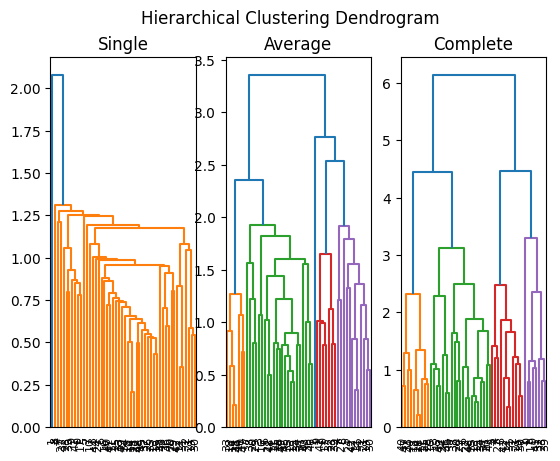

In [40]:
model = AgglomerativeClustering(n_clusters=4)
model = model.fit(df_pca)

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title('Single')
dendrogram(linkage(df_pca, method='single'), labels=df_pca.index, ax=ax1)
ax2.set_title('Average')
dendrogram(linkage(df_pca, method='average'), labels=df_pca.index, ax=ax2)
ax3.set_title('Complete')
dendrogram(linkage(df_pca, method='complete'), labels=df_pca.index, ax=ax3)
plt.show()

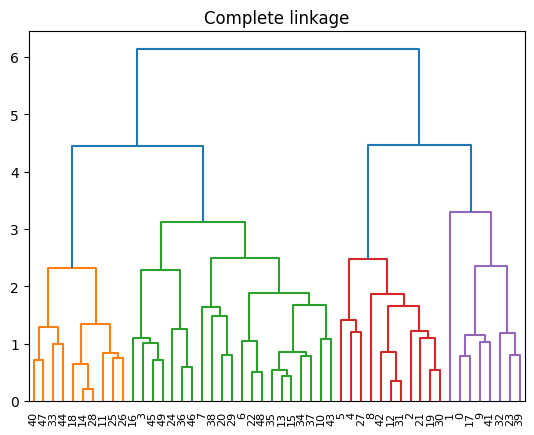

In [42]:
plt.title("Complete linkage")
dendrogram(linkage(df_pca, method='complete'), labels=df_pca.index)
plt.show()

K-MEANS CLUSTERING

C:\Users\suveenas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


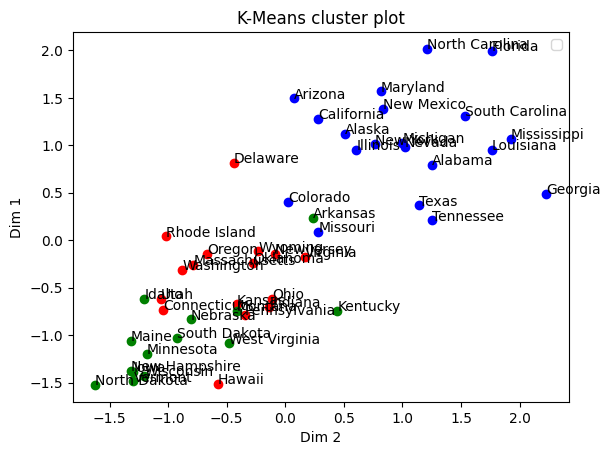

In [45]:
# Extract the first two components
x = X_scaled[:,0]
y = X_scaled[:,1]

# Fit K-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colors = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels==i], y[cluster_labels==i], c=colors[i])
    
for i in range(0,len(x)):
    txt = city[i]
    ax.annotate(txt, (x[i], y[i]))
    
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()